# Dealing with the time-axis

This notebook shows some strategies to deal with time-axis related issues. Here we are focusing mostly on python based solutions, but some of these tips can be adapted to other tools. 

In [1]:
## This is setup for the plots later on in the notebook - on the website this
## cell (and the cells making the diagrams) is hidden by default, using the 'hide-input' cell tag

import matplotlib
import matplotlib.pyplot as plt
import numbers
import numpy

def draw_chunks(ax, size = (10, 8), nchunks = (5, 2), chunk_size = None, chunk_color = None):
    """
    Draw a chunk diagram
    
    Args:
        ax:          matplotlib.pyplot axis to draw on
        size:        size of the array (x, y)
        nchunks:     number of chunks (x, y)
        chunk_size:  size of each chunk (x, y) (default size/nchunks)
        chunk_color: colour of each chunk (array with shape nchunks)
    """
    
    spacing = 0.1
    
    if chunk_size is None:
        chunk_size = (None, None)
        
    if chunk_color is None:
        chunk_color = numpy.full(nchunks, 'wheat')
    else:
        chunk_color = numpy.asarray(chunk_color)
        
    # Fill in None values
    chunk_size = tuple(chunk_size[i] if chunk_size[i] is not None else size[i] / nchunks[i]
                        for i in range(2))
    
    if isinstance(chunk_size[0], numbers.Number):
        xsize = numpy.full(nchunks[0], chunk_size[0]) - spacing
    else:
        xsize = numpy.asarray(chunk_size[0]) - spacing
        
    if isinstance(chunk_size[1], numbers.Number):
        ysize = numpy.full(nchunks[1], chunk_size[1]) - spacing
    else:
        ysize = numpy.asarray(chunk_size[1]) - spacing

                        
    # Chunk cell centre
    xc = (numpy.arange(nchunks[0], dtype='f') + 0.5) * (size[0] / nchunks[0])
    yc = (numpy.arange(nchunks[1], dtype='f') + 0.5) * (size[1] / nchunks[1])
    
    for ii in range(nchunks[0]):
        for jj in range(nchunks[1]):
            box = matplotlib.patches.Rectangle((xc[ii] - xsize[ii]/2,
                                                yc[jj] - ysize[jj]/2),
                                               xsize[ii],
                                               ysize[jj], 
                                               facecolor=chunk_color[ii,jj], edgecolor='black')
            
            ax.add_patch(box)
            
    ax.set_xbound(0, size[0])
    ax.set_ylim(0, size[1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    

## Useful python packages

If you are a {ref}`python` user, the most useful package to deal with time is {ref}`pandas<pyanalysis>`, {ref}`calendar<pyanalysis>` and {term}`dask` .



### Command-line tools

{ref}`cdo` and {ref}`nco` also offer some useful.

http://nco.sourceforge.net/nco.html#Timeseries-Reshaping-mode_002c-aka-Splitting

### Other languages (Matlab, R, etc.)

While we're not aware of anything quite as nice as Xarray and Dask for other languages, most languages have libraries for reading NetCDF files and working with MPI.

If you have suggestions for other libraries we can list here please let us know by [opening a ticket](https://github.com/ACDguide/BigData/issues/new)

### Time Resampling

Time resampling changes the temporal frequency of a dataset, say from hourly to daily. You can generally specify the operation to perform - min, mean, max etc. if going from a higher to lower frequency, or how values are interpolated if going from lower to higher frequency.

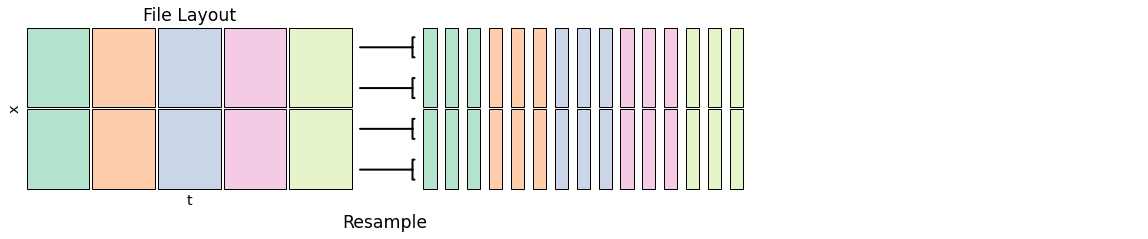

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,3))

colors = numpy.stack([['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9']]*2).T

draw_chunks(axs[0], chunk_color=colors)
axs[0].set_xlabel('t', fontsize='x-large')
axs[0].set_ylabel('x', fontsize='x-large')
axs[0].set_title('File Layout', fontsize='xx-large')

resample_colors = numpy.full((15, 2), '#ffffff')
for i in range(5):
    resample_colors[3*i:3*i+3] = colors[i]

draw_chunks(axs[1], nchunks=(15,2), chunk_size=(0.5, None), chunk_color=resample_colors)

axs[2].set_frame_on(False)
axs[2].set_xticks([])
axs[2].set_yticks([])

for i in range(4):
    h = 1/4 * (i+0.5)
    conn = matplotlib.patches.ConnectionPatch((1.02, h), (-0.02, h), axs[0].transAxes, axs[1].transAxes, arrowstyle='-[', linewidth=2)
    fig.add_artist(conn)
    
fig.add_artist(matplotlib.text.Text(0.375, -0.05, "Resample", fontsize='xx-large',  ha='center', transform=fig.transFigure))

None

**Resources**

 - **Xarray** [resample](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.resample.html) knows about time values, [coarsen](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.coarsen.html) uses sample counts but can work in all dimensions. See [Pandas offset strings](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) for how to specify different resample windows. Use a reduction operator like `.mean()` etc. after either of these to go from high to low frequency, or use `.resample().interpolate()` to go from low to high frequency
 - **CDO** see e.g. `cdo --operators | grep mean` for means on different timescales